In [1]:
#include <iostream>
#include <stdio.h>
#include <string>
#include <vector>

In [2]:
TFile *file = TFile::Open("../ttbar_8TeV.root");
TTree *tree = (TTree*) file->Get("mini");
tree->Print();

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

In [3]:
//create leading jet pt and all jets histograms
TH1F *cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",10,0,10);

TH1F *hist_nlep_mc = new TH1F("Number of leptons","n-leptons; Lepton multiplicity; Events",4,0,4);
TH1F *hist_lep_pt_mc = new TH1F("Leptons pt","Lepton pt; pt (GeV); Events",100,0,200);
TH1F *hist_lep_trackisolation_mc = new TH1F("Leptons track isolation","Lepton track; ptcone/pt; Events",10,0,0.2);
TH1F *hist_lep_calorisolation_mc = new TH1F("Leptons calorimeter isolation","Lepton calorimeter; etcone/pt; Events",10,0,0.2);
TH1F *hist_lep_eta_mc = new TH1F("Leptons eta","Lepton eta; eta; Events",20,-10,10);
TH1F *hist_lep_e_mc = new TH1F("Leptons E","Lepton E; E (GeV); Events",100,0,200);
TH1F *hist_nele_mc = new TH1F("Number of electrons","Number of electrons; Electron multiplicity; Events",5,0,5);
TH1F *hist_nmuon_mc = new TH1F("Number of muons","Number of muons; Muon multiplicity; Events",5,0,5);
TH1F *hist_jetn_mc = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *hist_njets_mc = new TH1F("Number of good jets","n-jets; Jet multiplicity; Events",6,4,10);
TH1F *hist_jet_pt_mc = new TH1F("Jet pt","Jet pt; pt (GeV); Events",100,0,200);
TH1F *hist_jet_eta_mc = new TH1F("Jet eta","Jet eta; eta; Events",20,-10,10);
TH1F *hist_jet_jvf_mc = new TH1F("Jet jvf","Jet jvf; jvf; Events",20,-1,2);
TH1F *hist_jet_mv1_mc = new TH1F("MV1","MV1; mv1; Events",10,0,1);
TH1F *hist_nbjets_mc = new TH1F("Number of b jets","n-bjets; Jet multiplicity; Events",4,2,6);
TH1F *hist_met_mc = new TH1F("MET value","MET; MET (GeV); Events",20,30,200);
TH1F *hist_mtw_mc = new TH1F("mTW value","mTW; mTW (GeV); Events",20,30,200);
//TH1F *aux = new TH1F("Number of good leptons","n-leptons; n-leptons; Events",10,0,10);

//create canvas
TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [4]:
// activate variables to use

//scalar variables
Bool_t e_trig;
Bool_t mu_trig;
Bool_t good_vtx;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;
Float_t eventWeight;

// vectorial or array variables
Float_t lep_pt[10];
Float_t lep_eta[10];
Float_t lep_phi[10];
Float_t lep_E[10];
Float_t lep_ptcone30[10];
Float_t lep_etcone20[10];
Int_t lep_type[10];

Float_t jet_pt[10];
Float_t jet_eta[10];
Float_t jet_jvf[10];
Float_t jet_MV1[10];

//scale factors
Float_t scaleFactor_PILEUP;
Float_t scaleFactor_ELE;
Float_t scaleFactor_MUON;
Float_t scaleFactor_BTAG;
Float_t scaleFactor_TRIGGER;
Float_t scaleFactor_JVFSF;
Float_t scaleFactor_ZVERTEX;

// assign address of data to variables
tree->SetBranchAddress("trigE", &e_trig);
tree->SetBranchAddress("trigM", &mu_trig);
tree->SetBranchAddress("hasGoodVertex", &good_vtx);
tree->SetBranchAddress("lep_n", &lep_n);
tree->SetBranchAddress("jet_n", &jet_n);
tree->SetBranchAddress("met_et", &MET);
tree->SetBranchAddress("met_phi", &MET_phi);
tree->SetBranchAddress("mcWeight", &eventWeight);

tree->SetBranchAddress("lep_pt", &lep_pt);
tree->SetBranchAddress("lep_eta", &lep_eta);
tree->SetBranchAddress("lep_phi", &lep_phi);
tree->SetBranchAddress("lep_E", &lep_E);
tree->SetBranchAddress("lep_type", &lep_type);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20);

tree->SetBranchAddress("jet_pt", &jet_pt);
tree->SetBranchAddress("jet_eta", &jet_eta);
tree->SetBranchAddress("jet_jvf", &jet_jvf);
tree->SetBranchAddress("jet_MV1", &jet_MV1);

tree->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
tree->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
tree->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
tree->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);
tree->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
tree->SetBranchAddress("scaleFactor_JVFSF", &scaleFactor_JVFSF);
tree->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);

In [5]:
//loop and fill the histograms
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

int cut1 = 0;
int cut2 = 0;
int cut3 = 0;
int cut4 = 0;
int cut5 = 0;
int cut6 = 0;
int cut7 = 0;
int cut8 = 0;


for (i = 0; i < nentries; i++) {
    nbytes = tree->GetEntry(i);
    vector <int> index;

    //First cut: Good vertex
    if (!good_vtx) continue;
    cut1++;
    cutflow->Fill(1);

    //Second cut: Trigger
    if (!e_trig && !mu_trig) continue;
    cut2++;
    cutflow->Fill(2);

    //Preselection of good leptons
    int n_mu = 0; //number of good muons
    int n_el = 0; //number of good electrons
    int n_lep = 0; //number of good leptons


    //Loop over leptons
    for (unsigned i = 0; i < lep_n; i++) {
        if (lep_pt[i] < 25000.0) continue;
        if (lep_ptcone30[i]/lep_pt[i] > 0.15) continue;
        if (lep_etcone20[i]/lep_pt[i] > 0.15) continue;
        if (lep_type[i] == 13 && TMath::Abs(lep_eta[i]) < 2.5) {
            n_mu++;
        }
        //To complete: Add electrons and extract the index for the good lepton
        float center = (1.52+1.37)/2;
        float width = (1.52-1.37)/2;
        if (lep_type[i] == 11 && TMath::Abs(lep_eta[i]) < 2.47 ) {
        if (TMath::Abs(TMath::Abs(lep_eta[i]) - center) > width) {
          n_el++;
        }
      }
      index.push_back(i);
      n_lep++;
    }

    /*std::cout << index.size() << std::endl;
    aux->Fill(index.size());*/

    //Select events with only 1 good lepton and fill the cutflow histogram
    //Third cut (one good lepton):
    if (n_lep != 1) continue;
    cutflow->Fill(3);
    cut3++;


    int n_jets = 0;
    int n_bjets = 0;

    
    //Fourth cut: At least 4 jets
    if (jet_n < 4) continue;
    cutflow->Fill(4);
    cut4++;

    for (unsigned j = 0; j < jet_n; j++) {
        // To complete: apply jet cuts to find the good jets
        if (jet_pt[j] < 25000.) continue;
        if (TMath::Abs(jet_eta[j]) > 2.5) continue; //Eta cut
        //JVF cut
        if (jet_pt[j] < 50000. && TMath::Abs(jet_eta[j]) < 2.4 && TMath::Abs(jet_jvf[j]) > 0.5) {
            n_jets++;
        }
        if (jet_pt[j] > 50000. && TMath::Abs(jet_jvf[j]) > 0.5) {
            n_jets++;
        }
        if (jet_MV1[j] < 0.7892) continue; //cut on 0.7892 MV1 and count the number of b-jets
            n_bjets++;
    }

    //Fifth cut: At least 4 good jets
    if (n_jets < 4) continue;
    cutflow->Fill(5);
    cut5++;

    //Sixth cut: at least two b-jet
    if (n_bjets < 2) continue;
    cutflow->Fill(6);
    cut6++;

    //Seventh cut: MET > 30 GeV
    if (MET < 30000.) continue;
    cutflow->Fill(7);
    cut7++;

    //TLorentzVector definitions
    TLorentzVector Lepton = TLorentzVector();
    TLorentzVector MeT = TLorentzVector();

    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    Lepton.SetPtEtaPhiE(lep_pt[index[0]],lep_eta[index[0]],lep_phi[index[0]],lep_E[index[0]]);
    MeT.SetPtEtaPhiE(MET,0,MET_phi,MET);

    //Calculation of the mTW using TLorenzt vectors
    float mTW = sqrt(2*Lepton.Pt()*MeT.E()*(1-cos(Lepton.DeltaPhi(MeT))));

    //Eight cut: mTW > 30 GeV
    if (mTW < 30000.) continue;
    cutflow->Fill(8);
    cut8++;

    index.clear();
    
    
    
    //Number of jets distribution
    Float_t scaleFactor = scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_TRIGGER*scaleFactor_JVFSF*scaleFactor_ZVERTEX;
    Float_t evtw = scaleFactor*eventWeight;
    
    hist_nlep_mc->Fill(n_lep,evtw);
    hist_lep_pt_mc->Fill(lep_pt[index[0]]/1000.,evtw);
    hist_lep_trackisolation_mc->Fill(lep_ptcone30[index[0]]/lep_pt[index[0]],evtw);
    hist_lep_calorisolation_mc->Fill(lep_etcone20[index[0]]/lep_pt[index[0]],evtw);
    hist_lep_eta_mc->Fill(lep_phi[index[0]],evtw);
    hist_lep_e_mc->Fill(lep_E[index[0]]/1000.,evtw);
    hist_nele_mc->Fill(n_el,evtw);
    hist_nmuon_mc->Fill(n_mu,evtw);
    hist_jetn_mc->Fill(jet_n,evtw);
    hist_njets_mc->Fill(n_jets,evtw);
    for (unsigned i = 0; i < n_jets; i++) {
      hist_jet_pt_mc->Fill(jet_pt[i]/1000.,evtw);
      hist_jet_eta_mc->Fill(jet_eta[i],evtw);
      hist_jet_jvf_mc->Fill(jet_jvf[i],evtw);
      hist_jet_mv1_mc->Fill(jet_MV1[i],evtw);
    }
    hist_nbjets_mc->Fill(n_bjets,evtw);
    hist_met_mc->Fill(MET/1000.,evtw);
    hist_mtw_mc->Fill(mTW/1000.,evtw);

    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << "\t" << nentries << std::endl;
std::cout << "Cut1:" << "\t" << cut1 << std::endl;
std::cout << "Cut2:" << "\t" << cut2 << std::endl;
std::cout << "Cut3:" << "\t" << cut3 << std::endl;
std::cout << "Cut4:" << "\t" << cut4 << std::endl;
std::cout << "Cut5:" << "\t" << cut5 << std::endl;
std::cout << "Cut6:" << "\t" << cut6 << std::endl;
std::cout << "Cut7:" << "\t" << cut7 << std::endl;
std::cout << "Cut8:" << "\t" << cut8 << std::endl;

Done!
All events:	1500000
Cut1:	1499487
Cut2:	1499487
Cut3:	1339289
Cut4:	624850
Cut5:	603262
Cut6:	254095
Cut7:	209720
Cut8:	176883


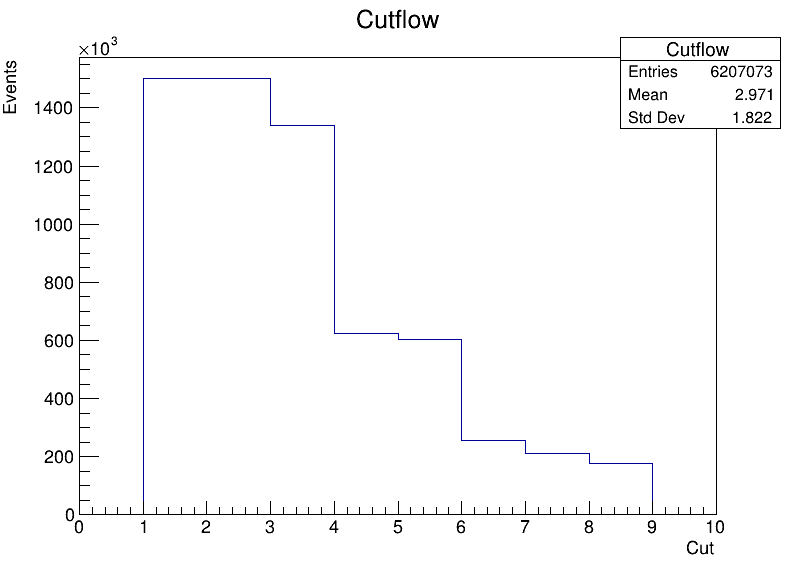

In [6]:
cutflow->Draw();
canvas->Draw();

# Data histograms

In [7]:
TFile f("hist_data.root");

TH1F *hist_nlep = (TH1F*) f.Get("Number of leptons");
TH1F *hist_lep_pt = (TH1F*) f.Get("Leptons pt");
TH1F *hist_lep_trackisolation = (TH1F*) f.Get("Leptons track isolation");
TH1F *hist_lep_calorisolation = (TH1F*) f.Get("Leptons calorimeter isolation");
TH1F *hist_lep_eta = (TH1F*) f.Get("Leptons eta");
TH1F *hist_lep_e = (TH1F*) f.Get("Leptons E");
TH1F *hist_nele = (TH1F*) f.Get("Number of electrons");
TH1F *hist_nmuon = (TH1F*) f.Get("Number of muons");
TH1F *hist_jetn = (TH1F*) f.Get("Number of jets");
TH1F *hist_njets = (TH1F*) f.Get("Number of good jets");
TH1F *hist_jet_pt = (TH1F*) f.Get("Jet pt");
TH1F *hist_jet_eta = (TH1F*) f.Get("Jet eta");
TH1F *hist_jet_jvf = (TH1F*) f.Get("Jet jvf");
TH1F *hist_jet_mv1 = (TH1F*) f.Get("MV1");
TH1F *hist_nbjets = (TH1F*) f.Get("Number of b jets");
TH1F *hist_met = (TH1F*) f.Get("MET value");
TH1F *hist_mtw = (TH1F*) f.Get("mTW value");

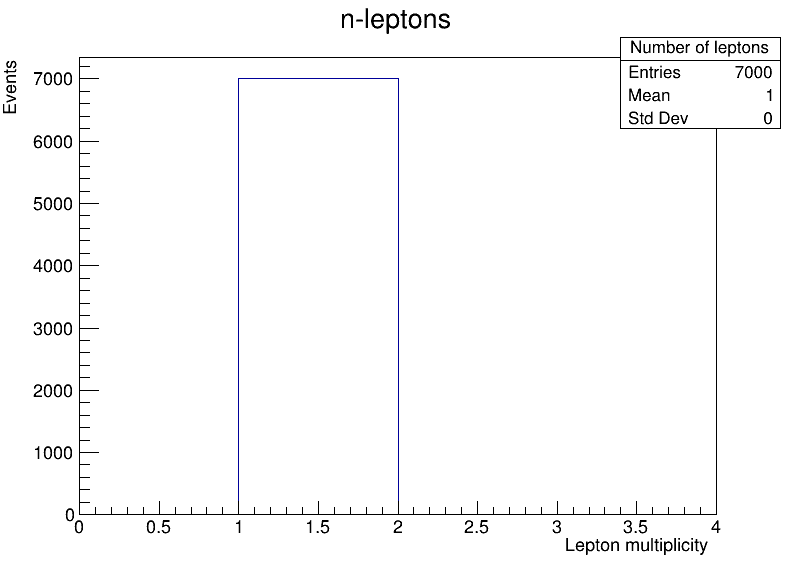

In [8]:
hist_nlep->Draw();
canvas->Draw();

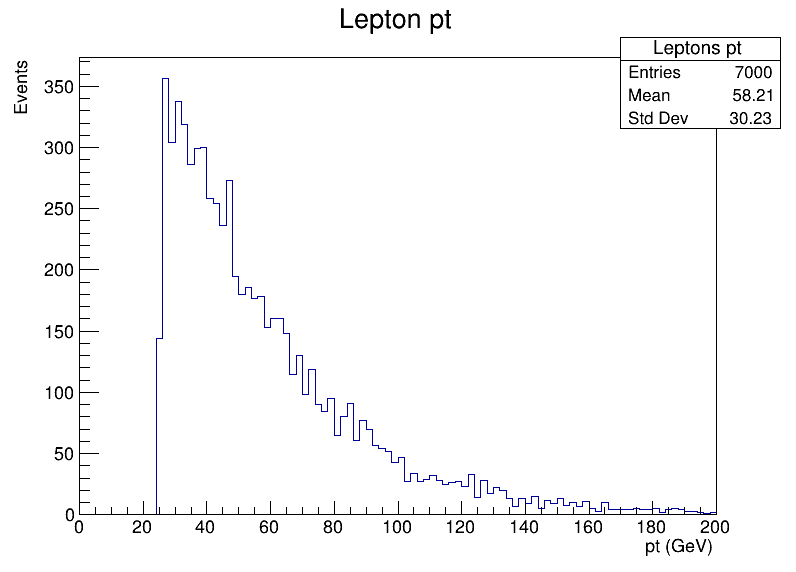

In [9]:
hist_lep_pt->Draw();
canvas->Draw();

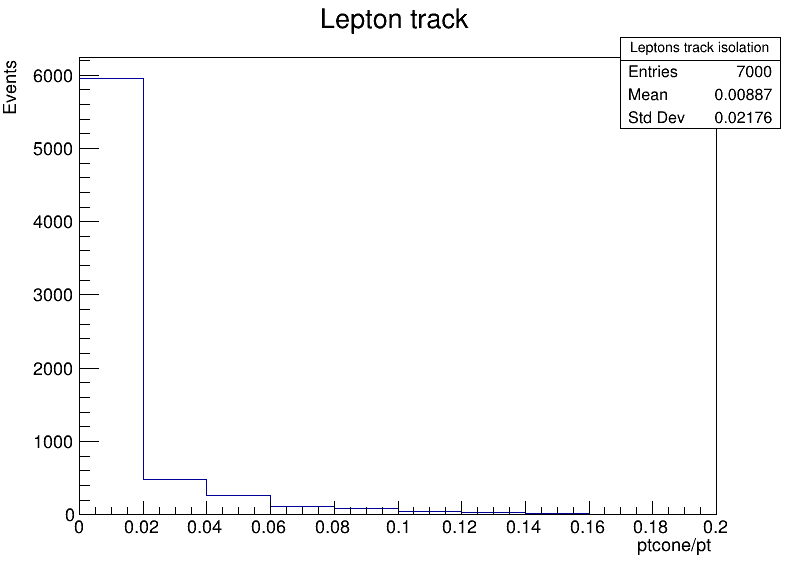

In [10]:
hist_lep_trackisolation->Draw();
canvas->Draw();

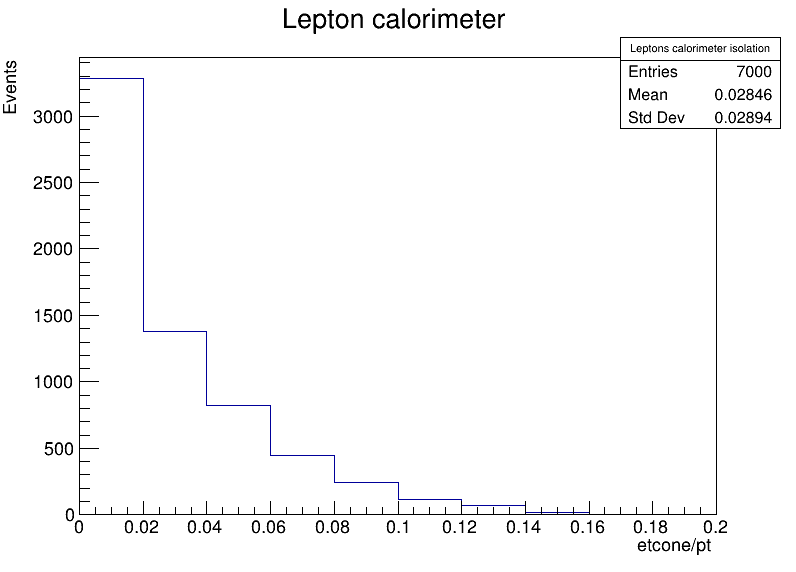

In [11]:
hist_lep_calorisolation->Draw();
canvas->Draw();

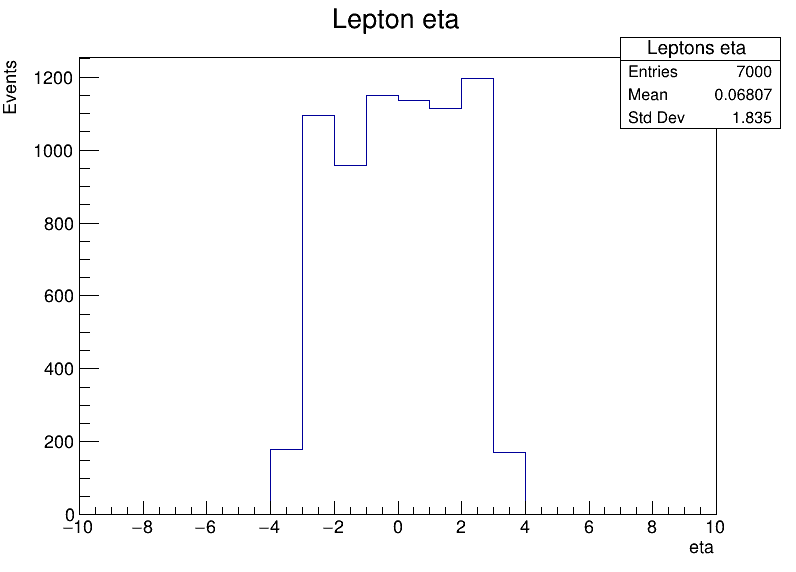

In [12]:
hist_lep_eta->Draw();
canvas->Draw();

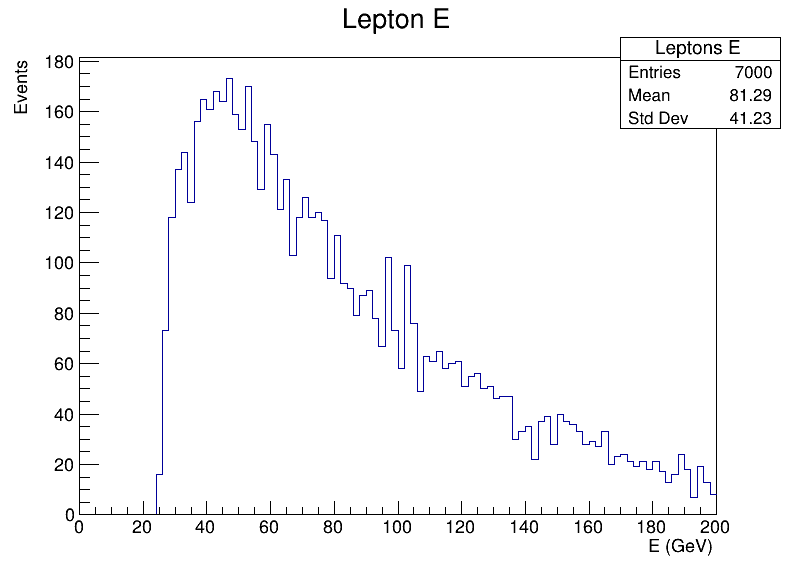

In [13]:
hist_lep_e->Draw();
canvas->Draw();

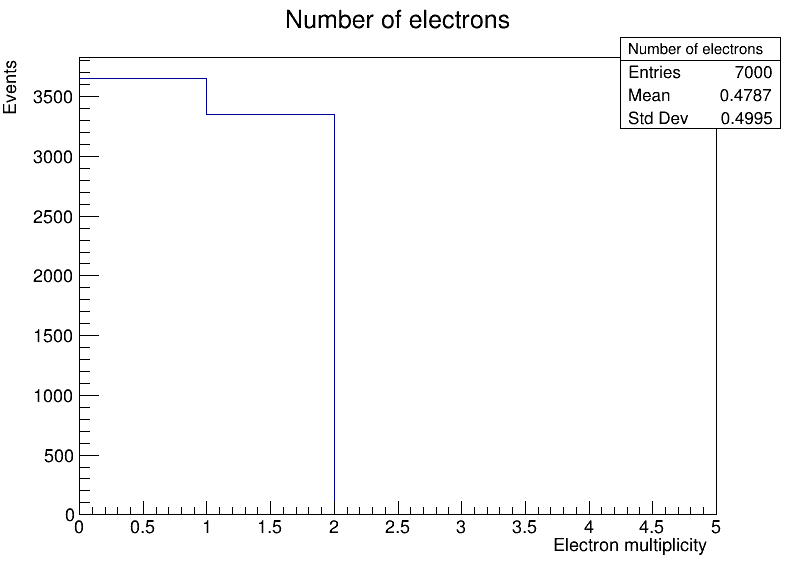

In [14]:
hist_nele->Draw();
canvas->Draw();

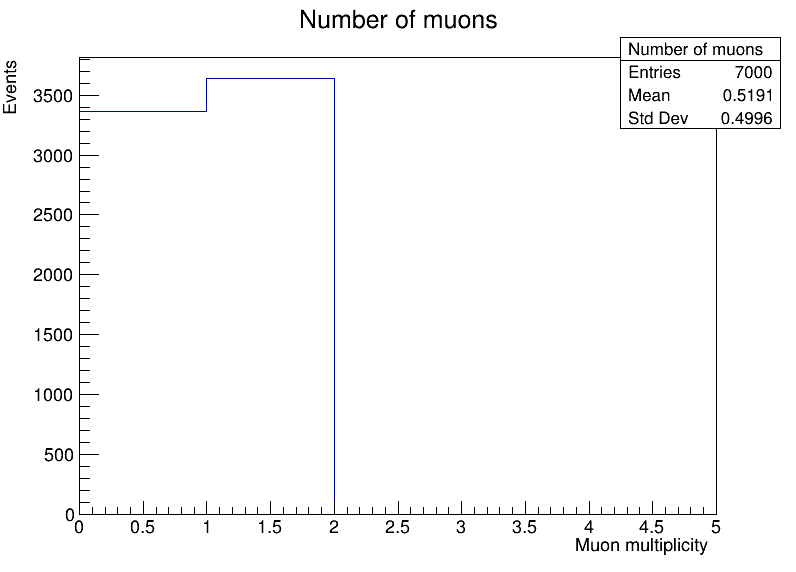

In [15]:
hist_nmuon->Draw();
canvas->Draw();

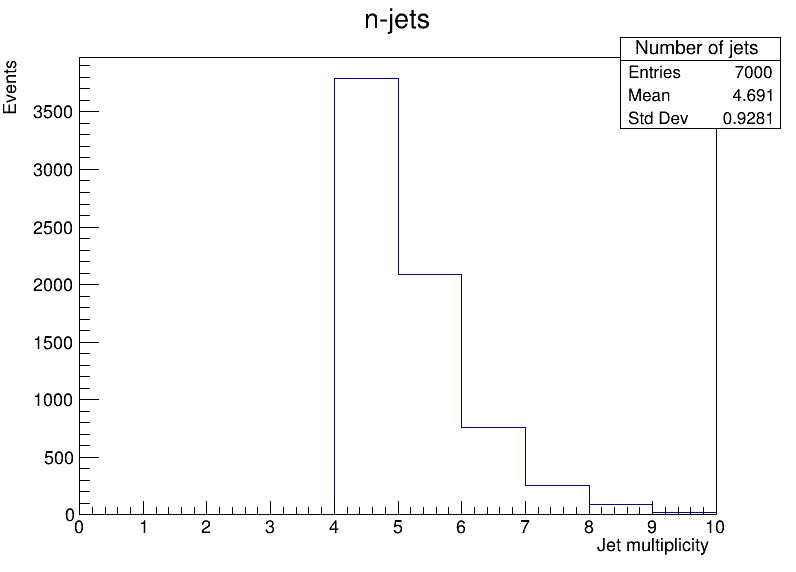

In [16]:
hist_jetn->Draw();
canvas->Draw();

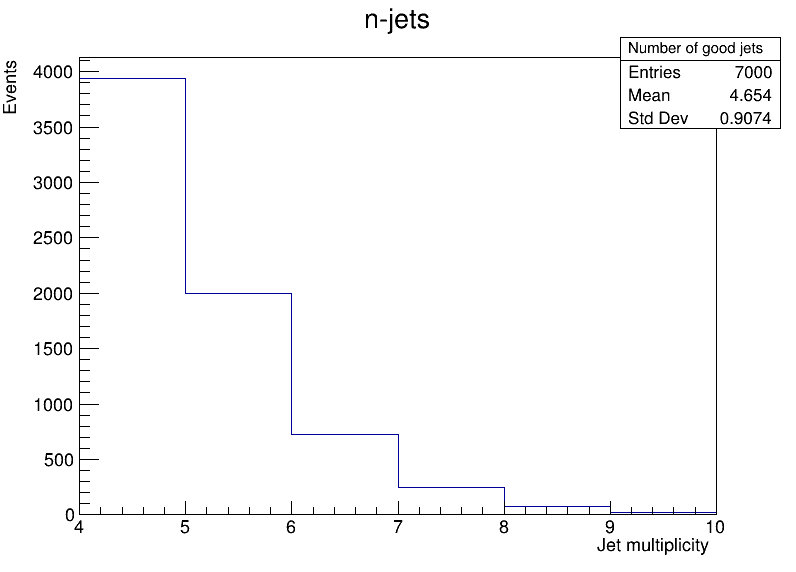

In [17]:
hist_njets->Draw();
canvas->Draw();

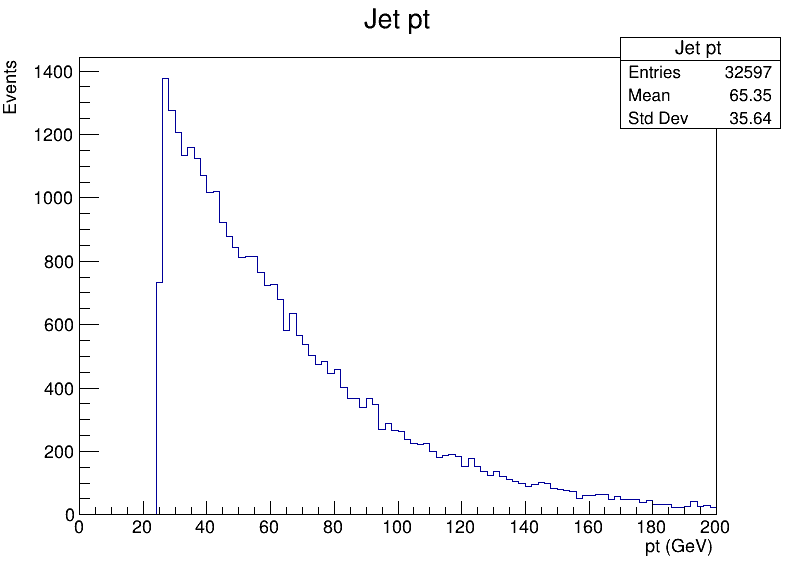

In [18]:
hist_jet_pt->Draw();
canvas->Draw();

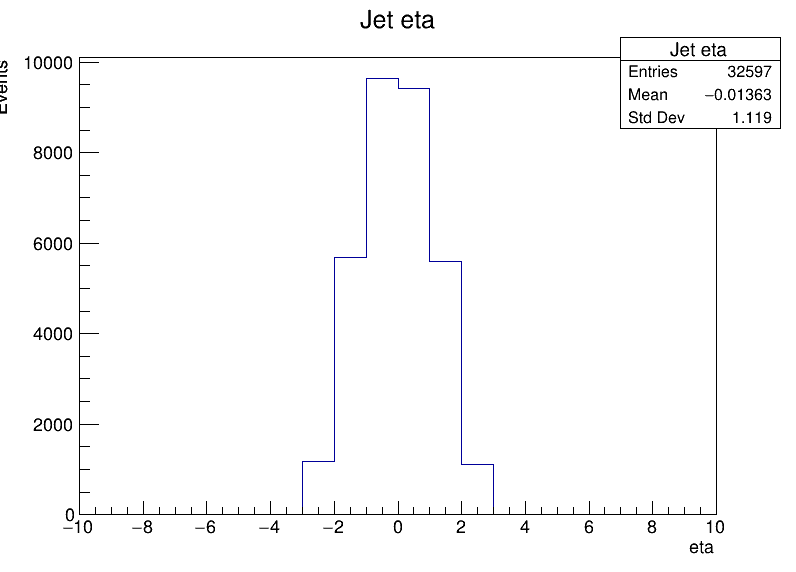

In [19]:
hist_jet_eta->Draw();
canvas->Draw();

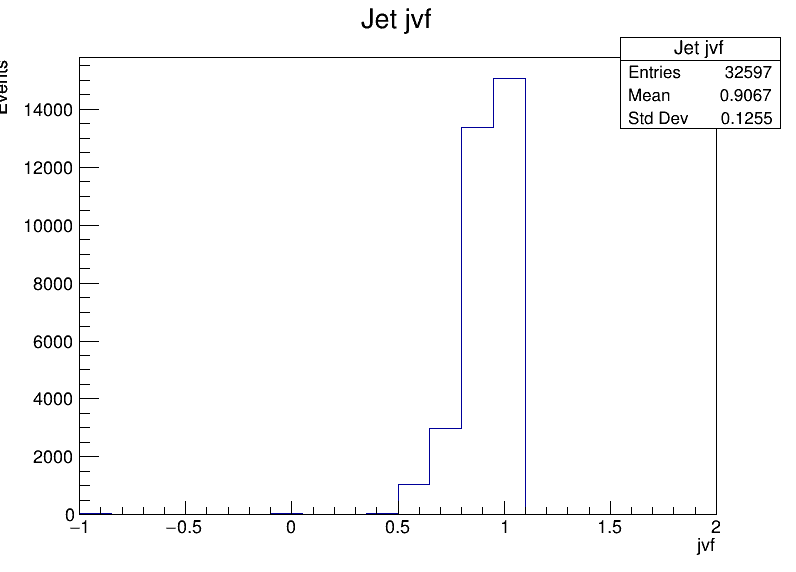

In [20]:
hist_jet_jvf->Draw();
canvas->Draw();

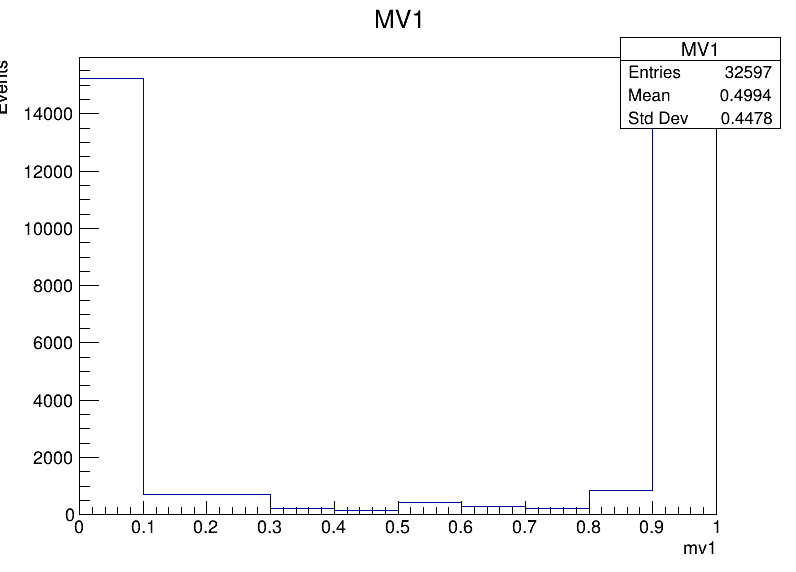

In [21]:
hist_jet_mv1->Draw();
canvas->Draw();

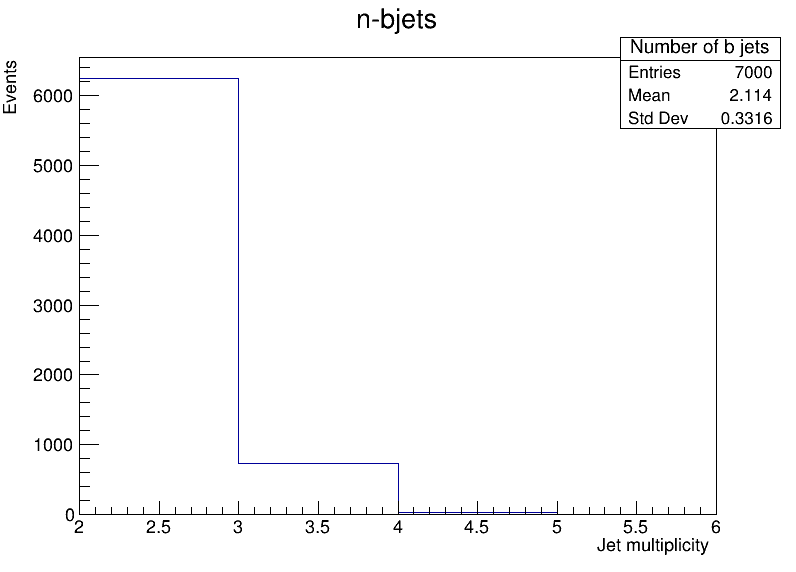

In [22]:
hist_nbjets->Draw();
canvas->Draw();

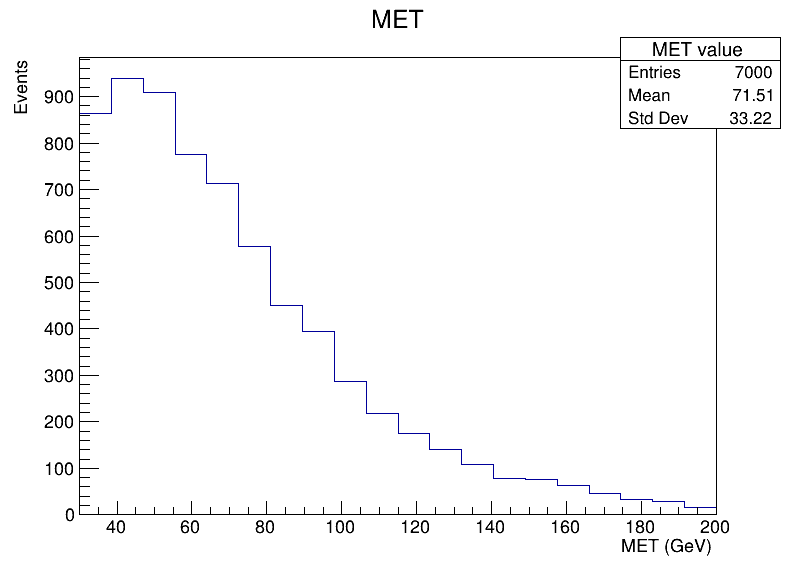

In [23]:
hist_met->Draw();
canvas->Draw();

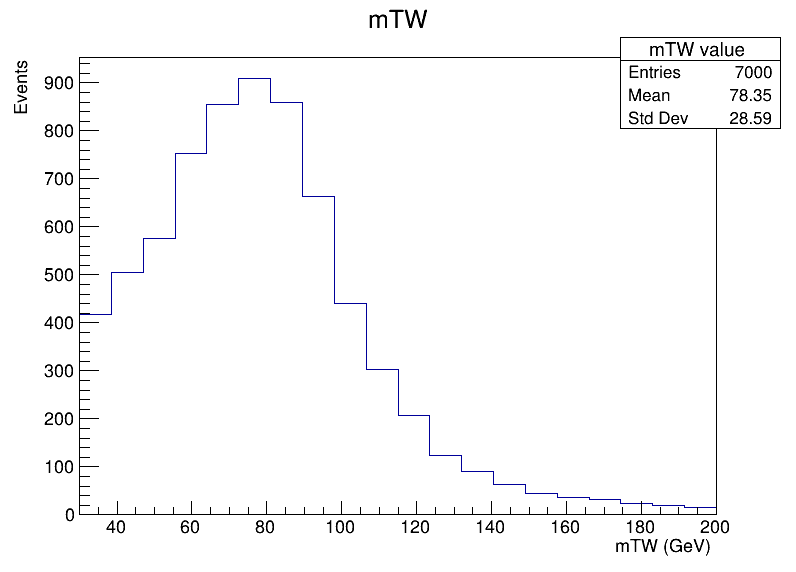

In [24]:
hist_mtw->Draw();
canvas->Draw();

# Comparing Data/MC

In [25]:
// rescale factor 
float rescale = (1000.*137.29749)/(49761200.21*0.072212854)

(float) 0.0382083f


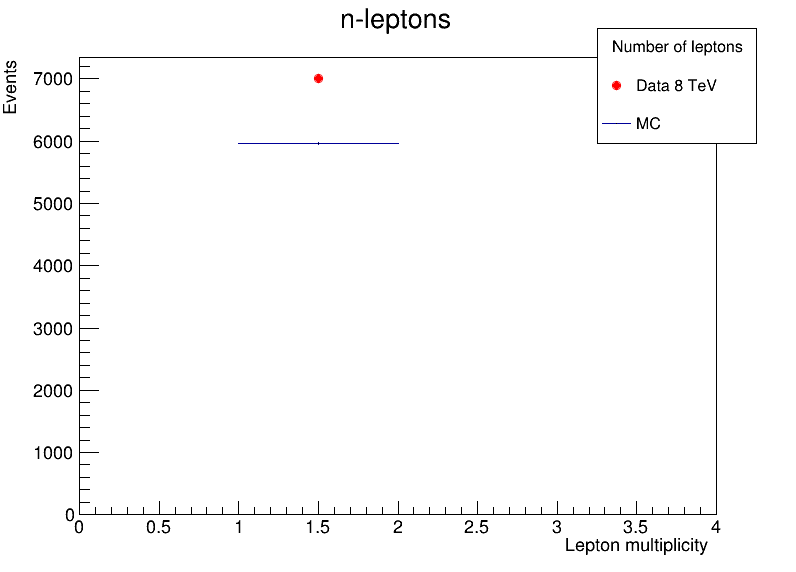

Info in <TCanvas::Print>: png file Data-MC/1_nlep.png has been created
Info in <TCanvas::Print>: pdf file Data-MC/Data-MC.pdf has been created using the current canvas


In [26]:
hist_nlep->SetMarkerStyle(20);
hist_nlep->SetMarkerColor(kRed);
hist_nlep->SetStats(0);
hist_nlep->Draw("p");
hist_nlep_mc->Scale(rescale);
hist_nlep_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of leptons","C");
leg->AddEntry(hist_nlep,"Data 8 TeV","p");
leg->AddEntry(hist_nlep_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/1_nlep.png");
canvas->Print("Data-MC/Data-MC.pdf(","Title:Number of leptons");

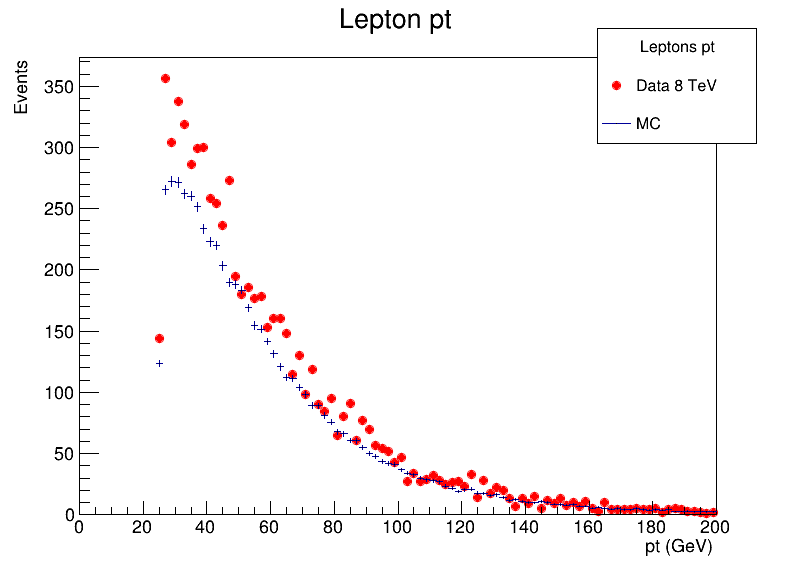

Info in <TCanvas::Print>: png file Data-MC/2_lep_pt.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [27]:
hist_lep_pt->SetMarkerStyle(20);
hist_lep_pt->SetMarkerColor(kRed);
hist_lep_pt->SetStats(0);
hist_lep_pt->Draw("p");
hist_lep_pt_mc->Scale(rescale);
hist_lep_pt_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Leptons pt","C");
leg->AddEntry(hist_lep_pt,"Data 8 TeV","p");
leg->AddEntry(hist_lep_pt_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/2_lep_pt.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Leptons pt");

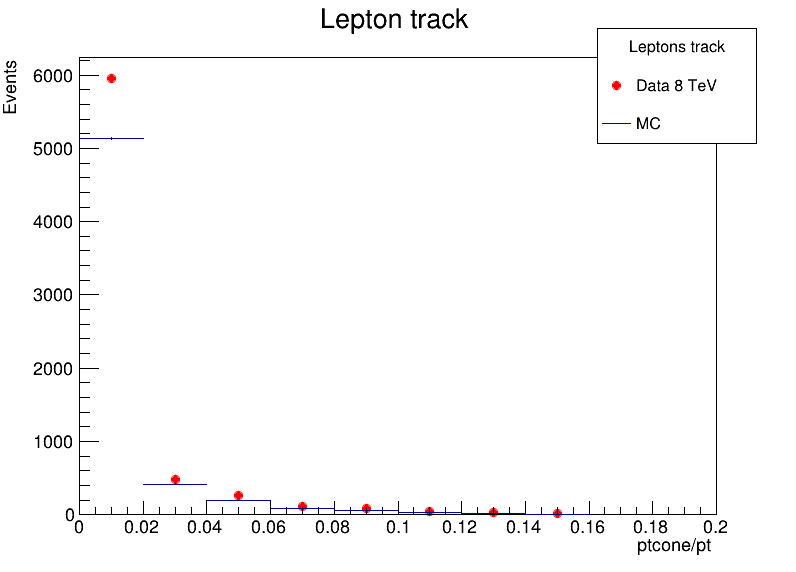

Info in <TCanvas::Print>: png file Data-MC/3_lep_trackisolation.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [28]:
hist_lep_trackisolation->SetMarkerStyle(20);
hist_lep_trackisolation->SetMarkerColor(kRed);
hist_lep_trackisolation->Draw("p");
hist_lep_trackisolation->SetStats(0);
hist_lep_trackisolation_mc->Scale(rescale);
hist_lep_trackisolation_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Leptons track","C");
leg->AddEntry(hist_lep_trackisolation,"Data 8 TeV","p");
leg->AddEntry(hist_lep_trackisolation_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/3_lep_trackisolation.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Leptons track isolation");

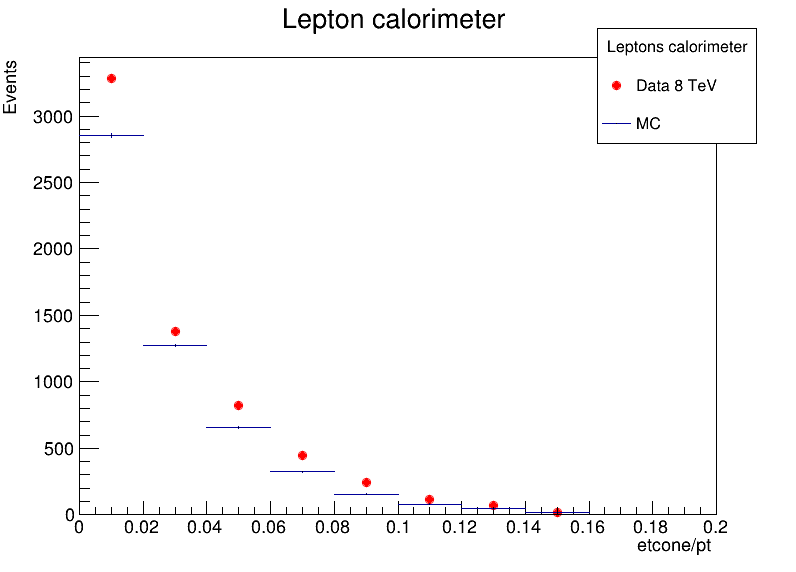

Info in <TCanvas::Print>: png file Data-MC/4_lep_calorisolation.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [29]:
hist_lep_calorisolation->SetMarkerStyle(20);
hist_lep_calorisolation->SetMarkerColor(kRed);
hist_lep_calorisolation->SetStats(0);
hist_lep_calorisolation->Draw("p");
hist_lep_calorisolation_mc->Scale(rescale);
hist_lep_calorisolation_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Leptons calorimeter","C");
leg->AddEntry(hist_lep_calorisolation,"Data 8 TeV","p");
leg->AddEntry(hist_lep_calorisolation_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/4_lep_calorisolation.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Leptons calorimeter isolation");

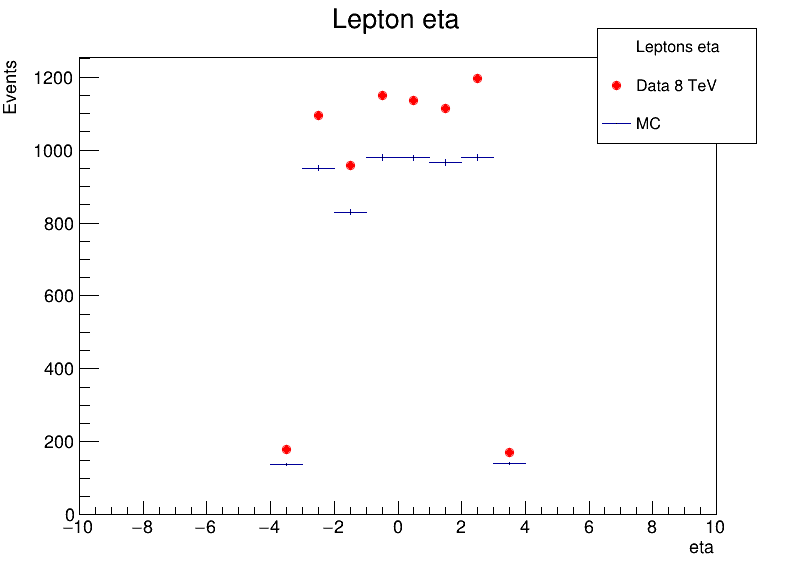

Info in <TCanvas::Print>: png file Data-MC/5_lep_eta.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [30]:
hist_lep_eta->SetMarkerStyle(20);
hist_lep_eta->SetMarkerColor(kRed);
hist_lep_eta->SetStats(0);
hist_lep_eta->Draw("p");
hist_lep_eta_mc->Scale(rescale);
hist_lep_eta_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Leptons eta","C");
leg->AddEntry(hist_lep_eta,"Data 8 TeV","p");
leg->AddEntry(hist_lep_eta_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/5_lep_eta.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Leptons eta");

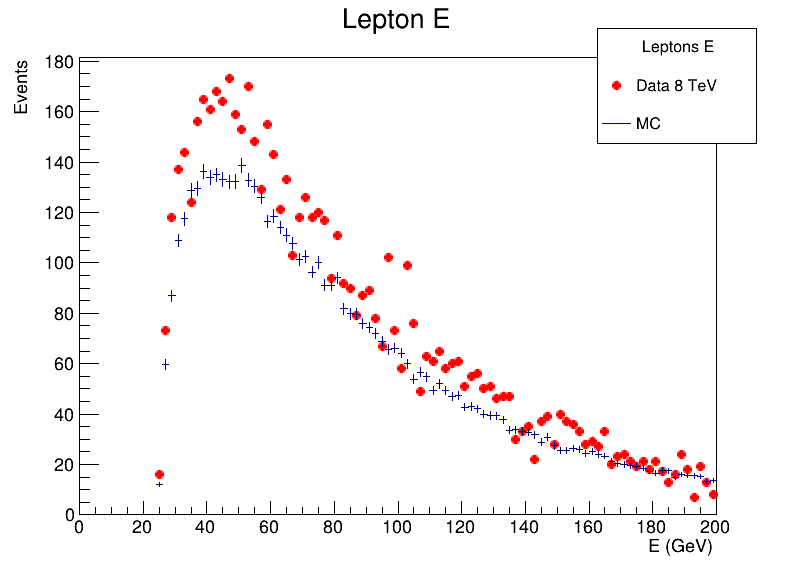

Info in <TCanvas::Print>: png file Data-MC/6_lep_e.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [31]:
hist_lep_e->SetMarkerStyle(20);
hist_lep_e->SetMarkerColor(kRed);
hist_lep_e->SetStats(0);
hist_lep_e->Draw("p");
hist_lep_e_mc->Scale(rescale);
hist_lep_e_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Leptons E","C");
leg->AddEntry(hist_lep_e,"Data 8 TeV","p");
leg->AddEntry(hist_lep_e_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/6_lep_e.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Leptons E");

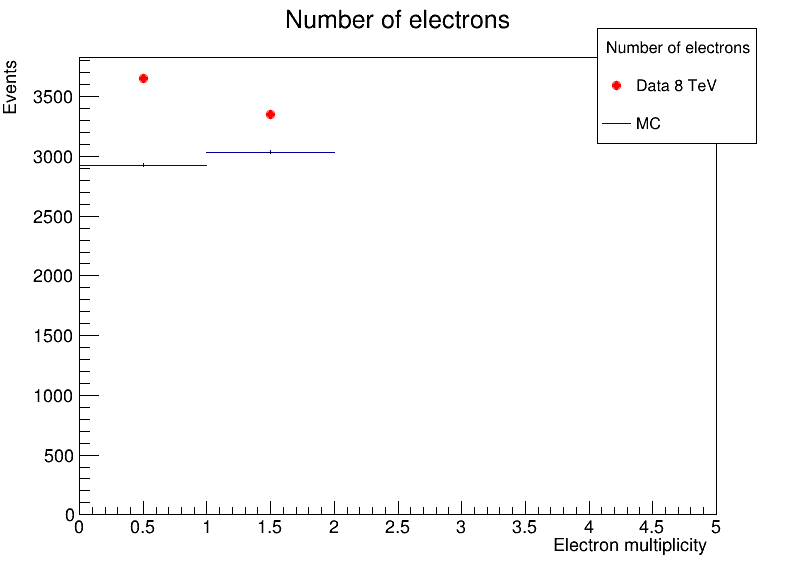

Info in <TCanvas::Print>: png file Data-MC/7_nele.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [32]:
hist_nele->SetMarkerStyle(20);
hist_nele->SetMarkerColor(kRed);
hist_nele->SetStats(0);
hist_nele->Draw("p");
hist_nele_mc->Scale(rescale);
hist_nele_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of electrons","C");
leg->AddEntry(hist_nele,"Data 8 TeV","p");
leg->AddEntry(hist_nele_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/7_nele.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Number of electrons");

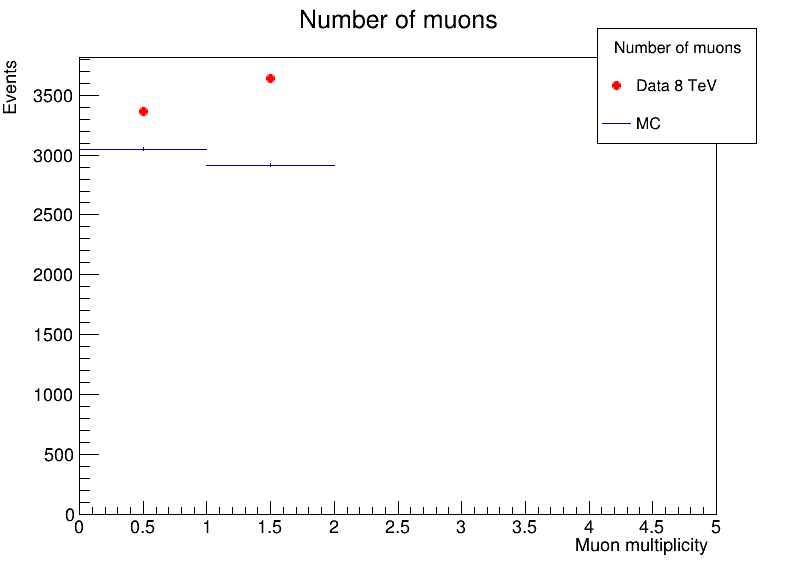

Info in <TCanvas::Print>: png file Data-MC/8_nmuon.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [33]:
hist_nmuon->SetMarkerStyle(20);
hist_nmuon->SetMarkerColor(kRed);
hist_nmuon->SetStats(0);
hist_nmuon->Draw("p");
hist_nmuon_mc->Scale(rescale);
hist_nmuon_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of muons","C");
leg->AddEntry(hist_nmuon,"Data 8 TeV","p");
leg->AddEntry(hist_nmuon_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/8_nmuon.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Number of muons");

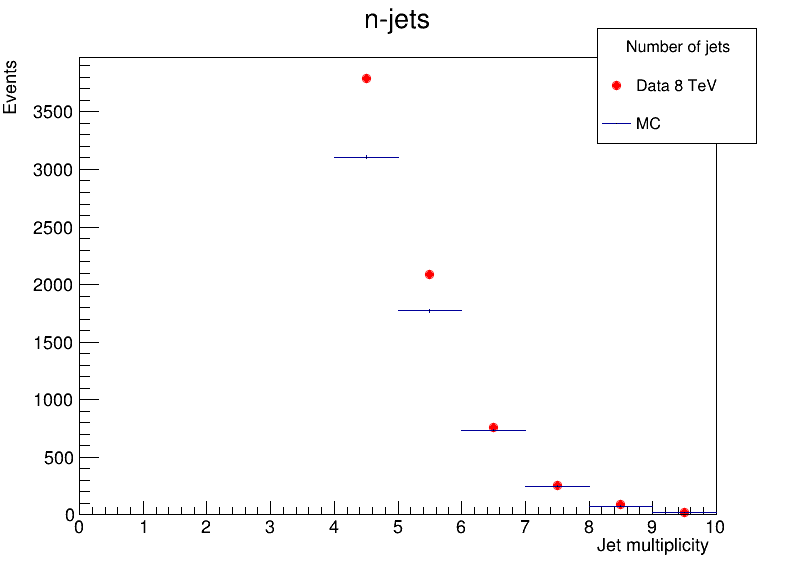

Info in <TCanvas::Print>: png file Data-MC/9_jetn.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [34]:
hist_jetn->SetMarkerStyle(20);
hist_jetn->SetMarkerColor(kRed);
hist_jetn->SetStats(0);
hist_jetn->Draw("p");
hist_jetn_mc->Scale(rescale);
hist_jetn_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of jets","C");
leg->AddEntry(hist_jetn,"Data 8 TeV","p");
leg->AddEntry(hist_jetn_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/9_jetn.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Number of jets");

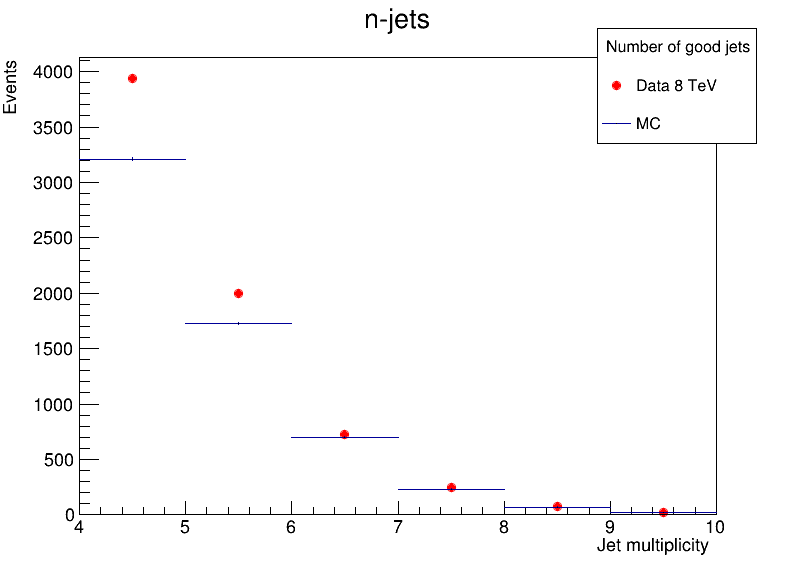

Info in <TCanvas::Print>: png file Data-MC/10_njets.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [35]:
hist_njets->SetMarkerStyle(20);
hist_njets->SetMarkerColor(kRed);
hist_njets->SetStats(0);
hist_njets->Draw("p");
hist_njets_mc->Scale(rescale);
hist_njets_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of good jets","C");
leg->AddEntry(hist_njets,"Data 8 TeV","p");
leg->AddEntry(hist_njets_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/10_njets.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Number of good jets");

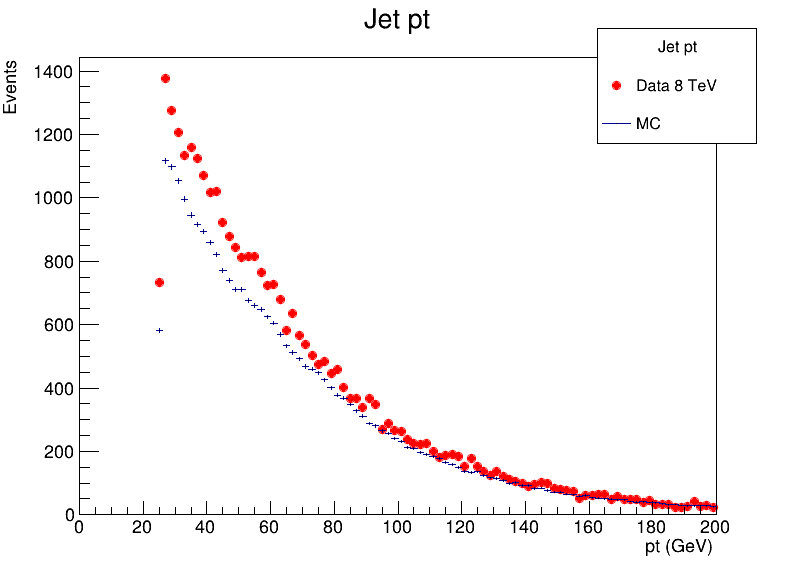

Info in <TCanvas::Print>: png file Data-MC/11_jet_pt.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [36]:
hist_jet_pt->SetMarkerStyle(20);
hist_jet_pt->SetMarkerColor(kRed);
hist_jet_pt->SetStats(0);
hist_jet_pt->Draw("p");
hist_jet_pt_mc->Scale(rescale);
hist_jet_pt_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Jet pt","C");
leg->AddEntry(hist_jet_pt,"Data 8 TeV","p");
leg->AddEntry(hist_jet_pt_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/11_jet_pt.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Jet pt");

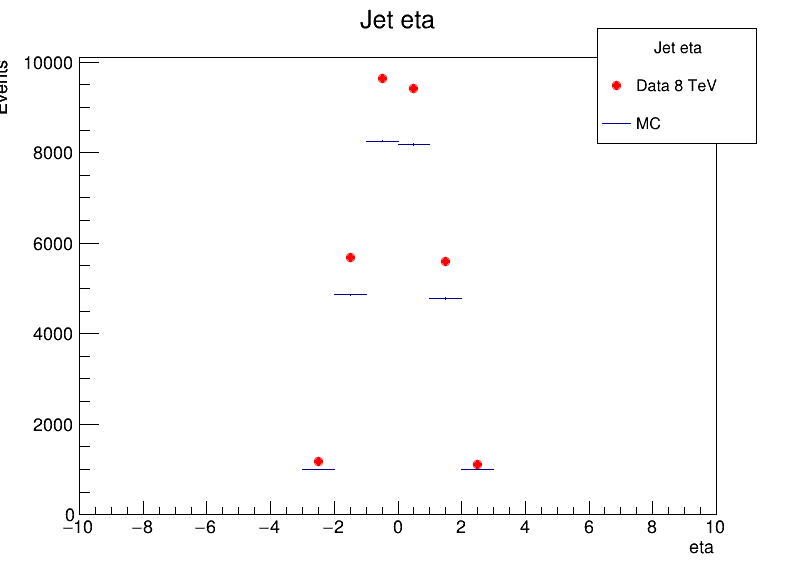

Info in <TCanvas::Print>: png file Data-MC/12_jet_eta.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [37]:
hist_jet_eta->SetMarkerStyle(20);
hist_jet_eta->SetMarkerColor(kRed);
hist_jet_eta->SetStats(0);
hist_jet_eta->Draw("p");
hist_jet_eta_mc->Scale(rescale);
hist_jet_eta_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Jet eta","C");
leg->AddEntry(hist_jet_eta,"Data 8 TeV","p");
leg->AddEntry(hist_jet_eta_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/12_jet_eta.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Jet eta");

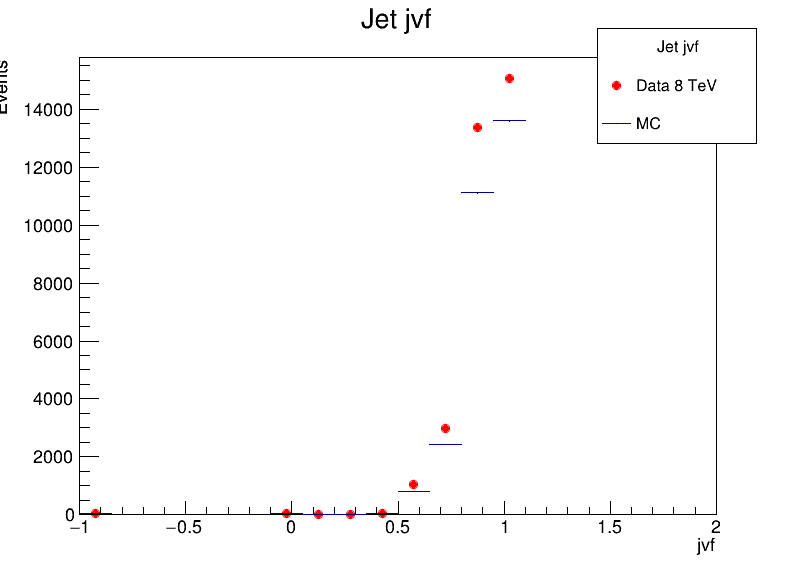

Info in <TCanvas::Print>: png file Data-MC/13_jet_jvf.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [38]:
hist_jet_jvf->SetMarkerStyle(20);
hist_jet_jvf->SetMarkerColor(kRed);
hist_jet_jvf->SetStats(0);
hist_jet_jvf->Draw("p");
hist_jet_jvf_mc->Scale(rescale);
hist_jet_jvf_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Jet jvf","C");
leg->AddEntry(hist_jet_jvf,"Data 8 TeV","p");
leg->AddEntry(hist_jet_jvf_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/13_jet_jvf.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Jet jvf");

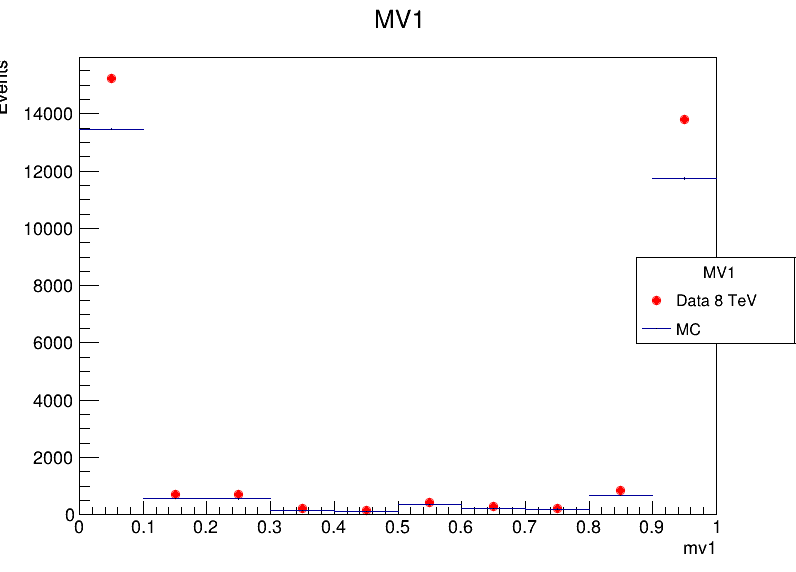

Info in <TCanvas::Print>: png file Data-MC/14_jet_mv1.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [39]:
hist_jet_mv1->SetMarkerStyle(20);
hist_jet_mv1->SetMarkerColor(kRed);
hist_jet_mv1->SetStats(0);
hist_jet_mv1->Draw("p");
hist_jet_mv1_mc->Scale(rescale);
hist_jet_mv1_mc->Draw("same");
leg = new TLegend(0.8,0.4,1,0.55);
leg->SetTextSize(0.03);
leg->SetHeader("MV1","C");
leg->AddEntry(hist_jet_mv1,"Data 8 TeV","p");
leg->AddEntry(hist_jet_mv1_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/14_jet_mv1.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Jet mv1");

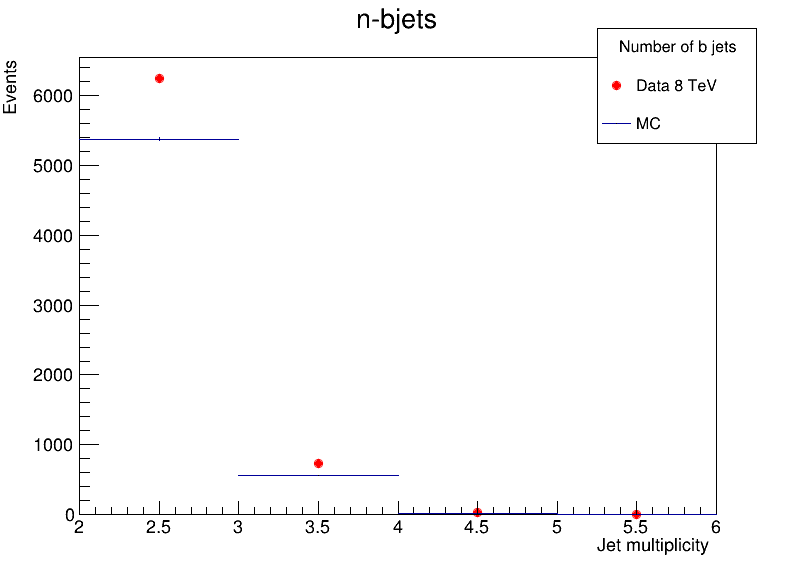

Info in <TCanvas::Print>: png file Data-MC/15_nbjets.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [40]:
hist_nbjets->SetMarkerStyle(20);
hist_nbjets->SetMarkerColor(kRed);
hist_nbjets->SetStats(0);
hist_nbjets->Draw("p");
hist_nbjets_mc->Scale(rescale);
hist_nbjets_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("Number of b jets","C");
leg->AddEntry(hist_nbjets,"Data 8 TeV","p");
leg->AddEntry(hist_nbjets_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/15_nbjets.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:Number of b-jets");

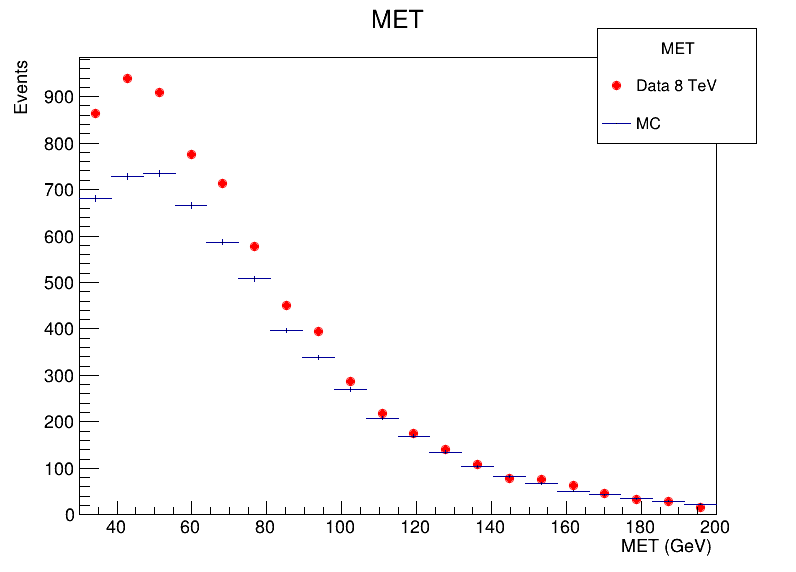

Info in <TCanvas::Print>: png file Data-MC/16_met.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf


In [41]:
hist_met->SetMarkerStyle(20);
hist_met->SetMarkerColor(kRed);
hist_met->SetStats(0);
hist_met->Draw("p");
hist_met_mc->Scale(rescale);
hist_met_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("MET","C");
leg->AddEntry(hist_met,"Data 8 TeV","p");
leg->AddEntry(hist_met_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/16_met.png");
canvas->Print("Data-MC/Data-MC.pdf","Title:MET");

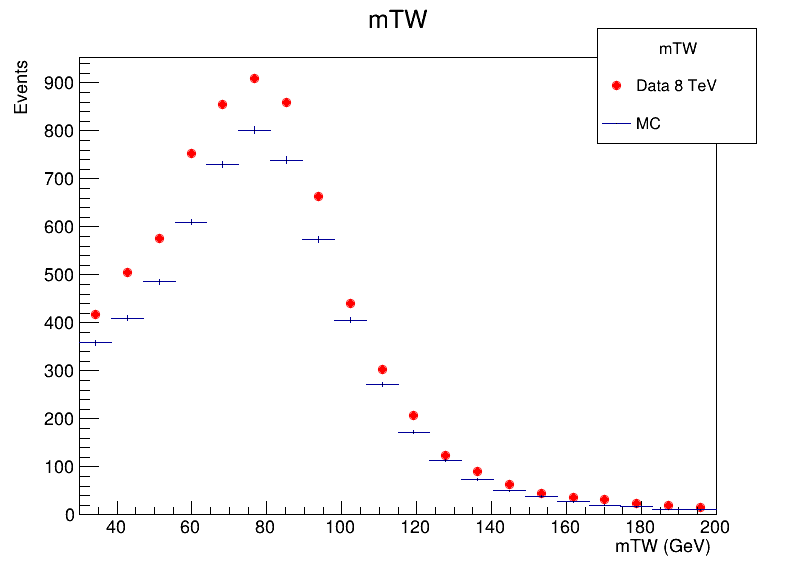

Info in <TCanvas::Print>: png file Data-MC/17_mtw.png has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Data-MC/Data-MC.pdf and file closed


In [42]:
hist_mtw->SetMarkerStyle(20);
hist_mtw->SetMarkerColor(kRed);
hist_mtw->SetStats(0);
hist_mtw->Draw("p");
hist_mtw_mc->Scale(rescale);
hist_mtw_mc->Draw("same");
leg = new TLegend(0.75,0.75,0.95,0.95);
leg->SetTextSize(0.03);
leg->SetHeader("mTW","C");
leg->AddEntry(hist_mtw,"Data 8 TeV","p");
leg->AddEntry(hist_mtw_mc,"MC");
leg->Draw();
canvas->Draw();
canvas->SaveAs("Data-MC/17_mtw.png");
canvas->Print("Data-MC/Data-MC.pdf)","Title:mTW");